# Feature Extraction Manual
En este notebook vamos a tratar de extraer manualmente las features de una imagen de cada una de las clases en las que se puede estar fijando el modelo que hemos creado desde cero. Mostraremos una unica imagen de cada clase, a modo de ejemplo

In [42]:
import os, sys 
import pandas as pd
import re


import numpy as np
import cv2 # OpenCV-Python
%matplotlib inline
import matplotlib.pyplot as plt
import random


In [43]:
# En primer lugar, obtenemos las rutas de un ejemplo de una imagen de cada clase
# Path where our data is located
base_path = "garbage_classification/"

# Dictionary to save our 12 classes
categories = {0: 'paper', 1: 'cardboard', 2: 'plastic', 3: 'metal', 4: 'trash', 5: 'battery',
              6: 'shoes', 7: 'clothes', 8: 'green-glass', 9: 'brown-glass', 10: 'white-glass',
              11: 'biological'}

def add_class_name_prefix(df, col_name):
    df[col_name] = df[col_name].apply(lambda x: x[:re.search("\d",x).start()] + '/' + x)
    return df

# list conatining all the filenames in the dataset
filenames_list = []

# list to store the corresponding category, note that each folder of the dataset has one class of data
categories_list = []

# recorremos todas las imagenes y nos quedamos con la primera de cada clase
for category in categories:
    filenames = os.listdir(base_path + categories[category])
    random_row = random.randint(0, len(filenames)-1)
    filenames_list.append(filenames[random_row])
    categories_list = categories_list + [category]
    
df = pd.DataFrame({
    'filename': filenames_list,
    'category': categories_list
})

df = add_class_name_prefix(df, 'filename')

# Shuffle the dataframe
df = df.sample(frac=1).reset_index(drop=True)
df

filename  category
0          clothes/clothes5143.jpg         7
1   white-glass/white-glass576.jpg        10
2      biological/biological30.jpg        11
3           plastic/plastic556.jpg         2
4               paper/paper290.jpg         0
5           battery/battery832.jpg         5
6               shoes/shoes858.jpg         6
7               metal/metal332.jpg         3
8               trash/trash263.jpg         4
9    green-glass/green-glass19.jpg         8
10      cardboard/cardboard439.jpg         1
11  brown-glass/brown-glass318.jpg         9

garbage_classification/clothes/clothes5143.jpg


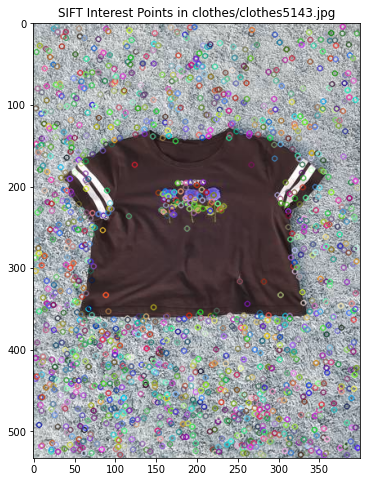

garbage_classification/white-glass/white-glass576.jpg


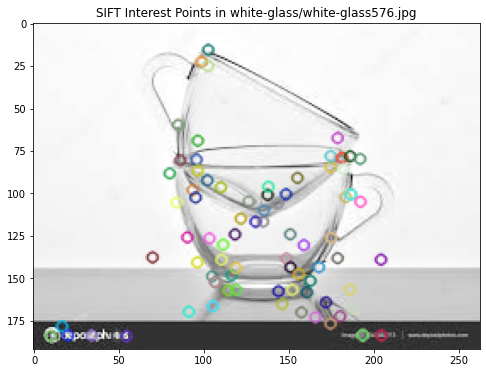

garbage_classification/biological/biological30.jpg


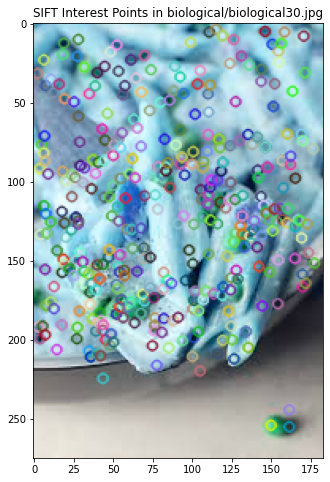

garbage_classification/plastic/plastic556.jpg


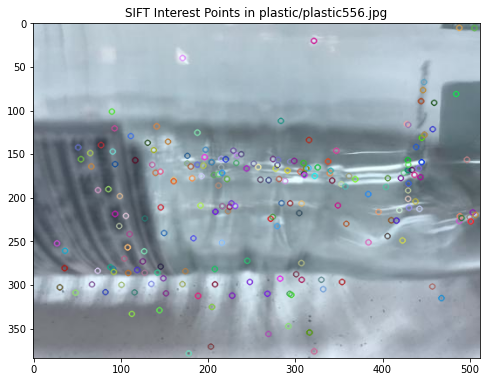

garbage_classification/paper/paper290.jpg


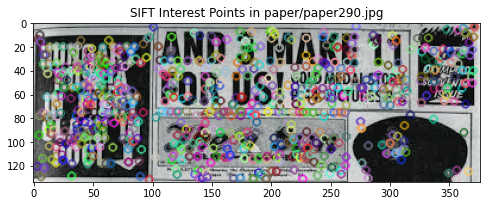

garbage_classification/battery/battery832.jpg


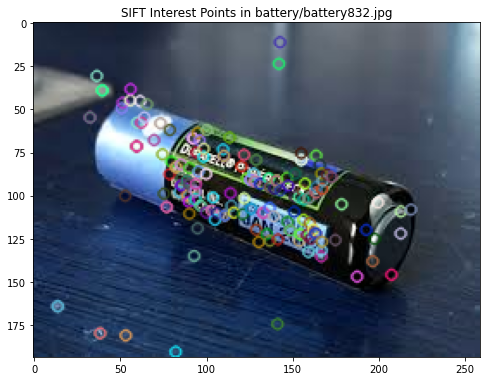

garbage_classification/shoes/shoes858.jpg


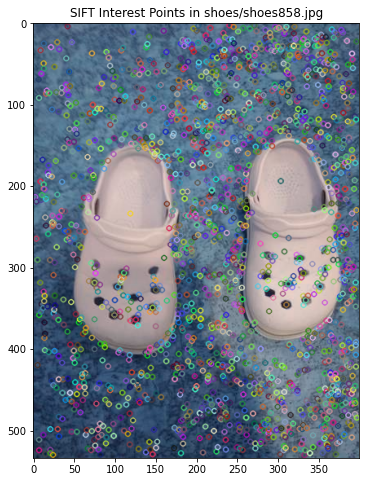

garbage_classification/metal/metal332.jpg


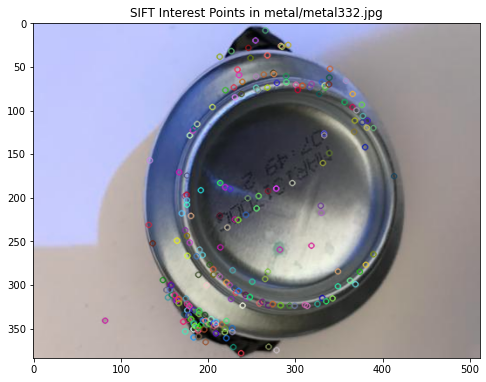

garbage_classification/trash/trash263.jpg


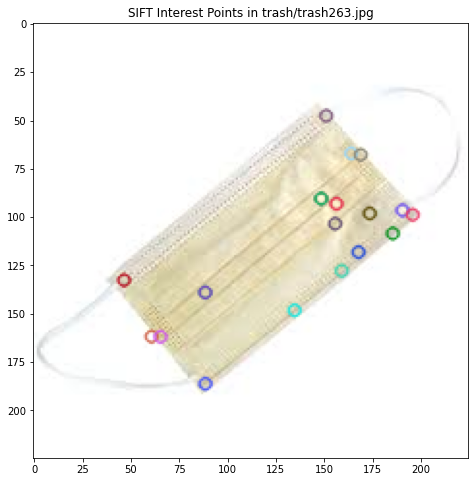

garbage_classification/green-glass/green-glass19.jpg


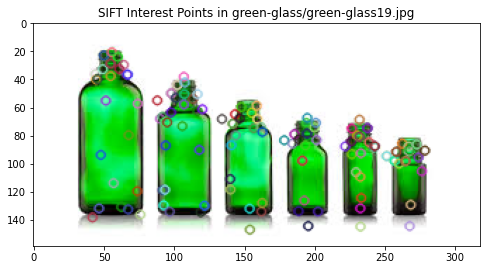

garbage_classification/cardboard/cardboard439.jpg


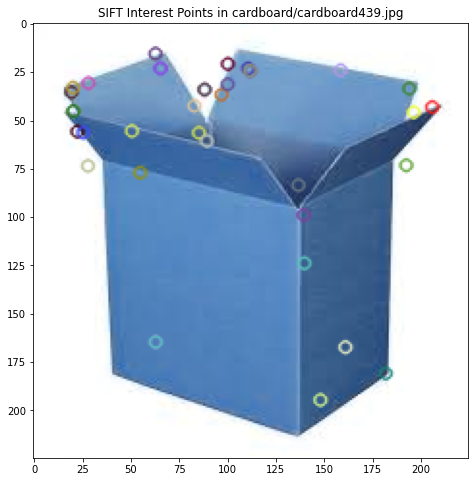

garbage_classification/brown-glass/brown-glass318.jpg


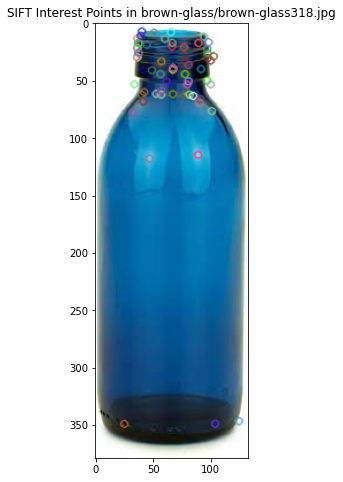

In [44]:

for index, row in df.iterrows():
    image_path = base_path + row[0]
    category = row[1]
    print(image_path)

    img_building = cv2.imread(image_path)

    orb = cv2.SIFT_create() 
    key_points, description = orb.detectAndCompute(img_building, None)
    img_building_keypoints = cv2.drawKeypoints(img_building, 
                                            key_points, 
                                            img_building, 
                                            flags=cv2.DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS)


    plt.figure(figsize=(8, 8))
    plt.title(f'SIFT Interest Points in {row[0]}')
    plt.imshow(img_building_keypoints); plt.show()

En las imagenes anteriores se puede ver cuáles son las features que podemos extraer de las imagenes del dataset de forma manual con el algoritmo de descenso de gradiente SIFT.

El algoritmo SIFT (Scale-Invariant Feature Transform) es un algoritmo de procesamiento de imágenes utilizado para detectar y describir características locales en imágenes. Utiliza el gradiente de la imagen para detectar y describir características locales en una imagen. En particular, la detección de puntos clave en SIFT se basa en el análisis del espacio de escala de la imagen y la detección de regiones de interés mediante la búsqueda de puntos que tengan una respuesta de filtro de Laplaciano máxima en una determinada escala. Una vez detectados los puntos clave, se utilizan los gradientes de los píxeles alrededor de cada punto clave para describir su entorno local. 

Como se puede ver en las imagenes, en todas aquellas que contienen algun logo, dibujo, o elemento extra que no sea unicamente la imagen "en claro", el algoritmo se distrae, y encuentra features importantes en estas partes en lugar de encontrarlas en el objeto como tal. Por ejemplo, en la clase paper, como en todas las imagenes se muestran portadas de revistas, artículos de noticias o elementos de un periódico, el alegoritmo está detectando estas partes como features importantes, lo que hace que a la hora de tratar de clasificar la imagen, sea más complicado, puesto que cada portada, articulo o elemento de un periódico tiene muy pocas características en común con el resto de periódicos.